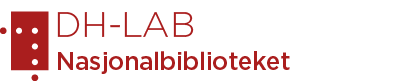

In [71]:
from dhlab.module_update import css
import dhlab.nbtext as nb
import dhlab.token_map as tm
import dhlab.graph_networkx_louvain as gnl
css()


# 1. Undersøk korpus med metadata


En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

Metadata er alt som er om teksten, fra forfatter til forlag. Også innholdsord kan sees på som metadata.


## 1.1. Bygg korpus

Korpuset defineres med metadata som dewey, emneord, navn , år, etc. Her kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for ulike måter å definere korpus.

In [72]:
bøker = nb.book_corpus(
    words = ["krig", "krigen", "soldater"],
    #author = "knutsen%b%",
    period =(1950, 2010),
    #title='%',
    #subject='krig',
    ddk='9%',
    lang = 'nob',
    limit=300)

In [73]:
bøker

,urn,author,title,year
0,2010090303010,"Kroglund, Nina Drolsum",For et fritt Afrika,1999
1,2013070308133,"Åsvang, Arnt O.","""Vaktvern i krig""",1978
2,2013042505038,"Jensen, Finn Robert","Gunnar ""Kjakan"" Sønsteby",2009
3,2013062506082,"Thomsen, Rudi",Verdenshistorien i grunnriss,1976
4,2012121207090,"Kauffman, Paul E.",Kinas kommende revolusjon,1979
...,...,...,...,...
295,2007072401122,"Tveit, Norvald",Fra gull til grønne skoger,1972
296,2007061804095,,Prester i den Norske kirke og andre teologiske...,1974
297,2014020708035,"Teigen, Reidar",I kano fra Larvik til Nilens kilder,2008
298,2013062038105,"Brænd, Bjørn",Oslofjorden friluftsguide,2009


## 1.2. Undersøk forskjeller

### 1.2.1. Undersøk forskjeller internt i korpuset

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [74]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = nb.get_corpus_text(nb.pure_urn(bøker)[:5])

In [75]:
bøker_dtm

,2010090303010,2013070308133,2013042505038,2013062506082,2012121207090
",",4404.0,723.0,1336.0,2920.0,1052.0
.,4095.0,894.0,2295.0,2205.0,1901.0
i,2853.0,433.0,765.0,1775.0,805.0
og,2549.0,592.0,766.0,1329.0,608.0
av,1397.0,194.0,356.0,1062.0,553.0
...,...,...,...,...,...
"1,16",NaN,NaN,NaN,NaN,1.0
"1,11",NaN,NaN,NaN,NaN,1.0
085,NaN,NaN,NaN,NaN,1.0
0461,NaN,NaN,NaN,NaN,1.0


#### 1.2.1.1. Visualiser med varmekart

Et varmekart gjør det enklere å få øye på likhet og variasjon i tallene.

In [76]:
nb.heatmap(bøker_dtm.head(10), color='#045599')

,2010090303010,2013070308133,2013042505038,2013062506082,2012121207090
",",4404,723,1336,2920,1052
.,4095,894,2295,2205,1901
i,2853,433,765,1775,805
og,2549,592,766,1329,608
av,1397,194,356,1062,553
til,1390,410,435,928,460
for,1267,195,319,526,449
som,1116,314,458,883,684
å,1093,248,475,582,627
var,1004,485,413,467,322


### 1.2.2. Undersøk forskjeller med frekvenser fra bokhylla

Tre hundre bøker tar en tid å laste ned og telle opp lokalt så vi teller på server med passende kommando:

In [77]:
bøker_agg = nb.aggregate_urns(nb.pure_urn(bøker))

Så konverteres listen over ord og tall til en dataramme

In [78]:
bøker_df = nb.frame_sort(nb.frame(bøker_agg, 'count'))

For referanse henter vi ut de 150000 mest frekvente ordene i bokhylla.

In [79]:
totals = nb.frame(nb.totals(150000), 'tot')

Sånn ser frekvensene ut for bøkene

In [80]:
bøker_df.head(10)

,count
.,1429101
",",1175726
og,659005
i,630116
til,319731
av,301698
som,295670
var,281488
det,279768
på,274341


.. og sånn for bokhylla

In [81]:
totals.head(10)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


For å lette arbeidet med å tolke forskjeller normaliserer vi frekvensene til tall mellom 0 og 1.

In [82]:
nb.normalize_corpus_dataframe(totals)
nb.normalize_corpus_dataframe(bøker_df)

True

Vi finner forskjellen ved å dividere den ene på den andre:

In [83]:
forskjell = bøker_df['count']/totals['tot']

Tallene viser hvor mye oftere et ord opptrer i tekstene sammenlignet med referansen. 

In [84]:
bøker_typiske_ord = nb.frame_sort(nb.frame(forskjell, 'ratio'))
bøker_typiske_ord.head(50)

,ratio
Drevsjø,217.927822
Åssiden,161.233017
Feda,152.977141
Milosevic,137.888490
Glemmen,113.291964
Onsøy,105.233370
Fellesrådet,101.024819
SAO,97.322611
Ungkarl,90.835624
Krustsjov,83.851452


#### 1.2.2.1. Visualiser som ordsky

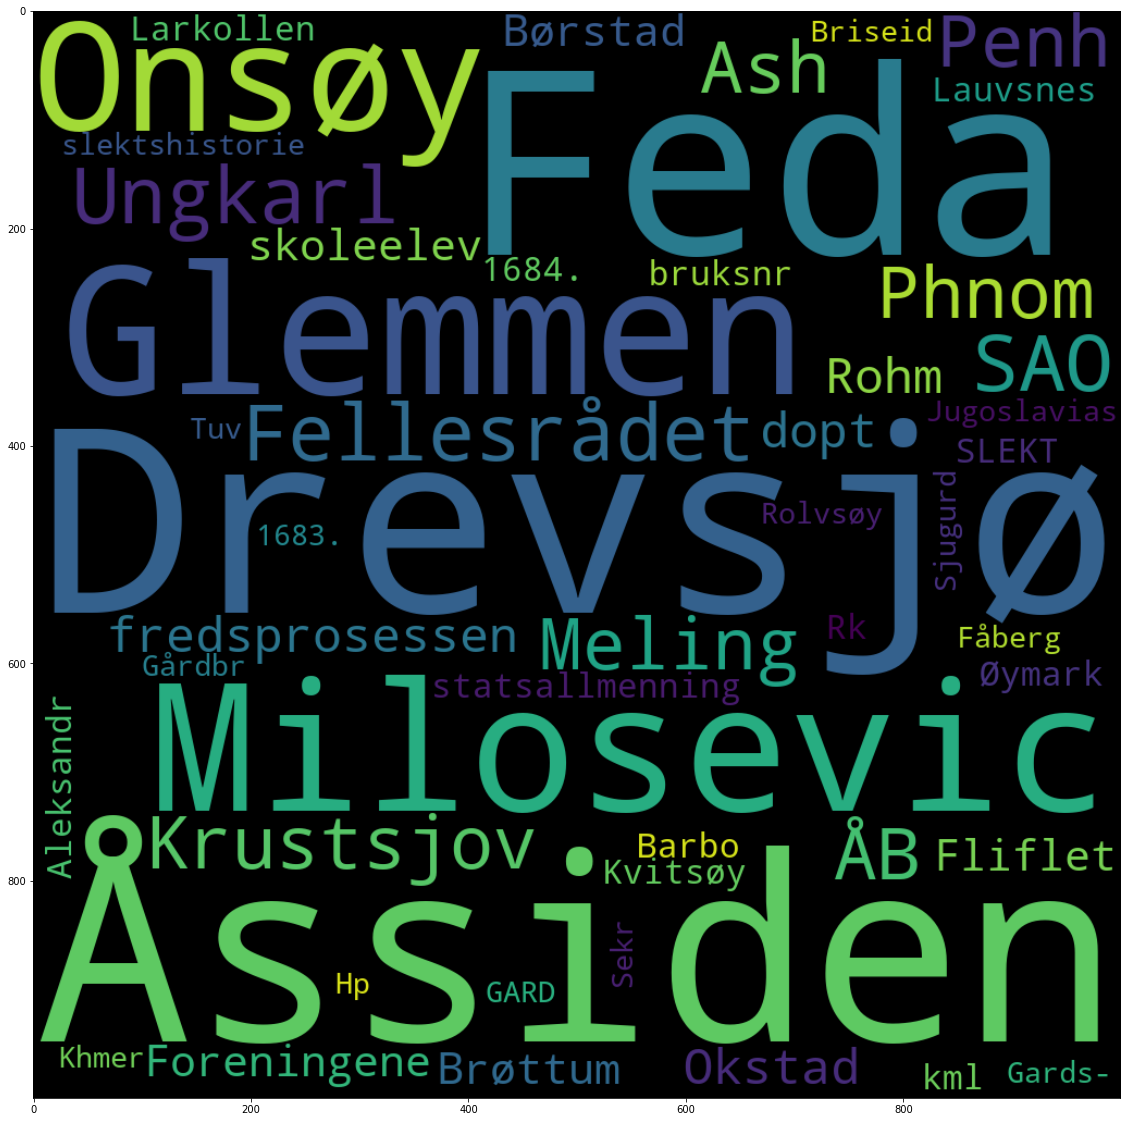

In [85]:
nb.cloud((bøker_typiske_ord/bøker_typiske_ord.sum()).head(50))

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)